In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset= pd.read_csv("Project_Dataset.csv",encoding='latin1')

# Exploring the dataset

In [ ]:
dataset.head(20)

,X,Y,Z,Activity
0,-0.969983,2.965034,9.790840,Sit
1,-0.505349,2.778223,9.817185,Sit
2,-0.548459,2.881209,10.001602,Sit
3,-0.682581,3.000960,10.032737,Sit
4,-0.591570,2.929109,9.769285,Sit
5,-0.874182,2.921924,9.448353,Sit
6,-0.617915,2.845283,9.055570,Sit
7,-0.397573,2.624942,9.182506,Sit
8,-0.747246,2.617756,10.289004,Sit
9,-0.941243,3.135081,11.081756,Sit


In [ ]:
dataset.tail(20)

,X,Y,Z,Activity
37395,-0.047900,3.079995,9.017249,Jog
37396,0.589175,1.372346,7.810159,Jog
37397,0.857417,2.660867,8.540640,Jog
37398,-0.313748,4.064348,9.491463,Jog
37399,-1.065784,4.792434,9.831555,Jog
37400,-1.674119,6.210286,8.430470,Jog
37401,-1.808240,6.531219,6.342012,Jog
37402,-1.470542,5.079837,8.926238,Jog
37403,-0.778381,3.848797,10.164463,Jog
37404,-0.725691,4.545747,9.424402,Jog


In [ ]:
dataset['Activity'].unique()

array(['Sit', 'Stand', 'Walk', 'Jog'], dtype=object)

In [ ]:
dataset.shape

(37415, 4)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37415 entries, 0 to 37414
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         37415 non-null  float64
 1   Y         37415 non-null  float64
 2   Z         37415 non-null  float64
 3   Activity  37415 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.1+ MB


In [ ]:
#Checking for Null Values
dataset.isnull().values.sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


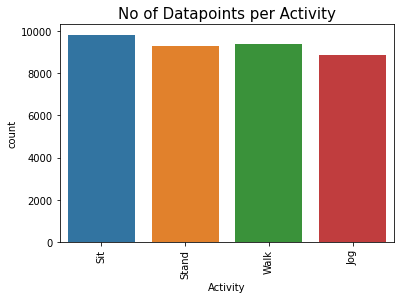

In [ ]:
#What types of activities are available and in what numbers
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(dataset.Activity)
plt.xticks(rotation=90)
plt.show()

In [ ]:
def plot_activity(Activity, dataset):
    data = dataset[dataset['Activity'] == Activity][['X', 'Y', 'Z']][:1000]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=Activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

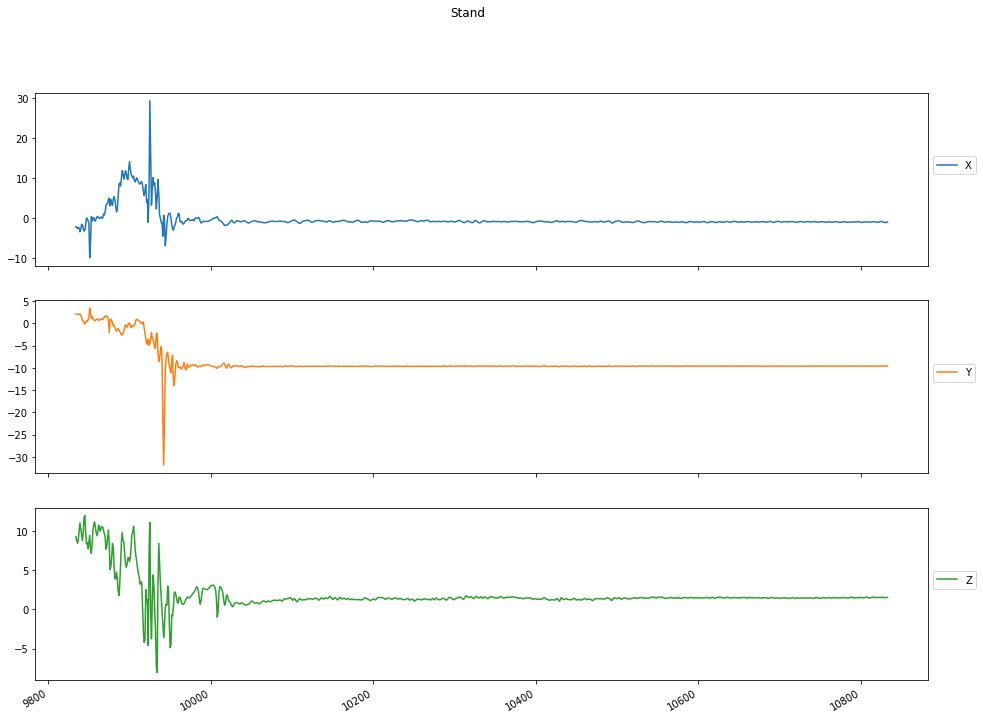

In [ ]:
plot_activity('Stand',dataset)

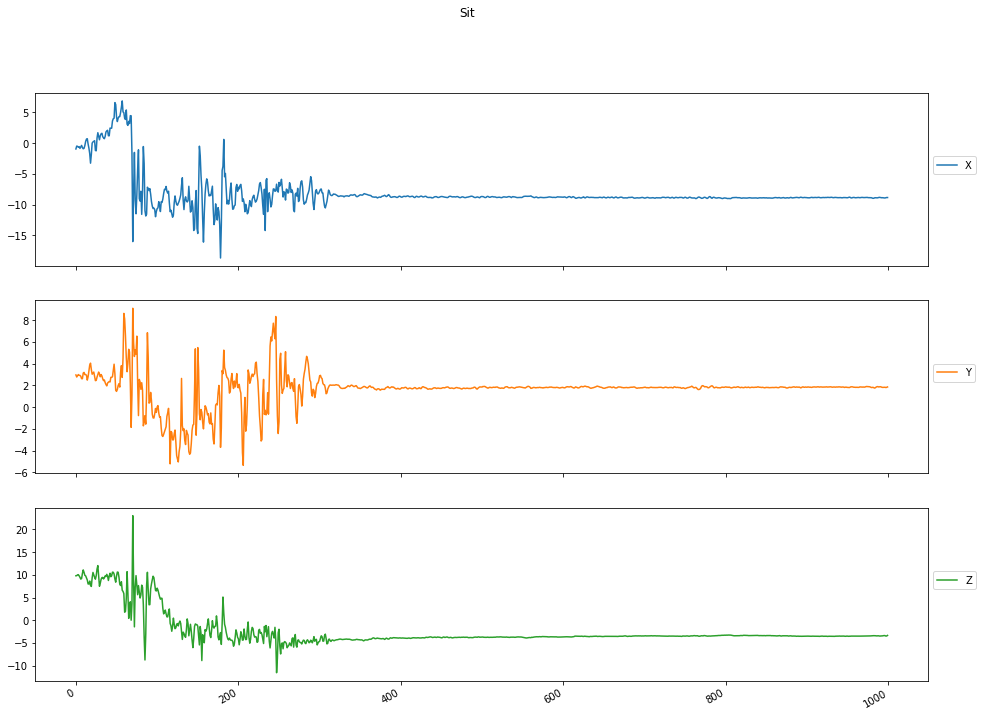

In [ ]:
plot_activity('Sit',dataset)

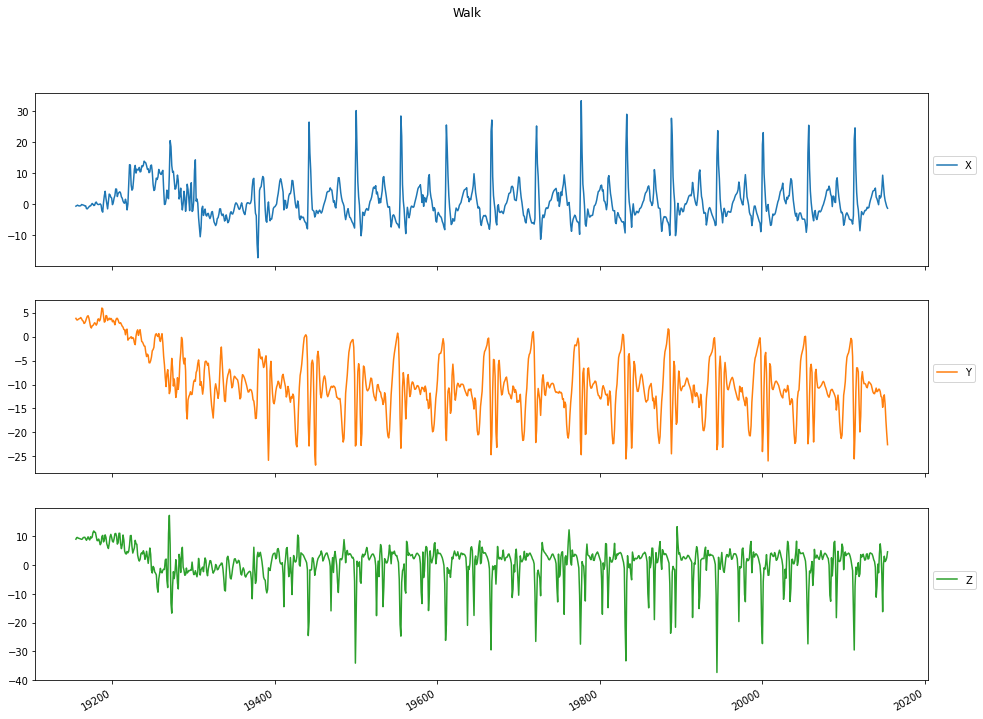

In [ ]:
plot_activity('Walk',dataset)

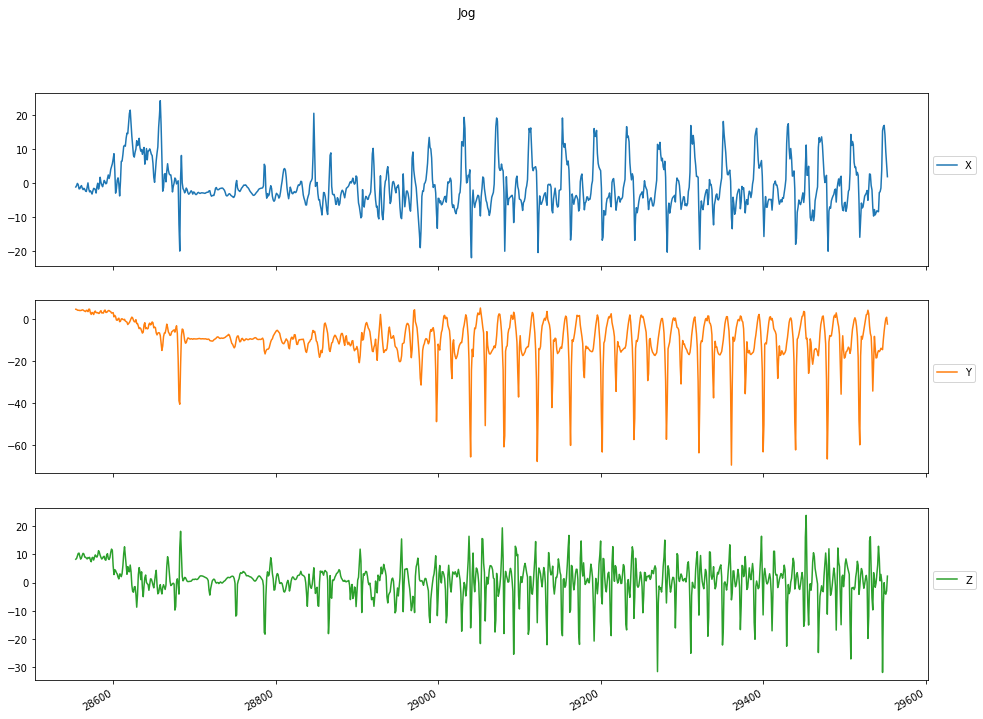

In [ ]:
plot_activity('Jog',dataset)

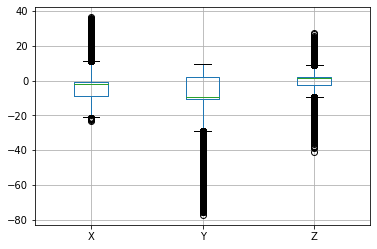

In [ ]:
dataset.boxplot()

# Data Processing

In [ ]:
#Shuffling the array
dataset = dataset.sample(frac = 1)

In [ ]:
xyz = dataset.iloc[:,:-1].values
activity = dataset.iloc[:,-1].values

The activitiy column is a category variable so we need to encode it using a Encoder. In this case we will use Label Encoder which is a representation of categorical variables as integers. Let's see how the activity column looks like after encoding.

In [ ]:
 from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
activity_encoded = activity.reshape((len(activity), 1))
activity_encoded = label_encoder.fit_transform(activity)
print(activity_encoded)

[3 3 3 ... 3 2 2]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xyz,activity_encoded, test_size=0.3, random_state=0)

We will now use a StandardScaler so that all the points of X,Y,Z align on the same scale, and one doesnt get preferred over the other point.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
print(x_train,y_train)

[[-1.02833559  1.0254559  -0.41515454]
 [ 0.32397517 -0.25939086  0.30802821]
 [-0.31815985  0.59648197  0.49702686]
 ...
 [ 1.16443347 -0.74490436  0.52852675]
 [-0.03826481 -0.53690128  0.78183749]
 [ 1.83324351 -0.84734967 -2.89095025]] [1 2 0 ... 3 3 3]


After scalling the training data we use PCA for 2 components.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Logistic Regression

All though Logistic Regression might not seem the best option, as it is useful only in case of a binary label but we can use it to check how other models will stand against Logistic Regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
#Tuning model can be done later
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
print(model.predict(sc.transform([[-1.214275,-9.563313,1.518442]])))

[2]


In [ ]:
y_pred = model.predict(x_test)
print("Y Predicted vs Y Test Set")
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

Y Predicted vs Y Test Set
[[2 2]
 [2 2]
 [3 3]
 ...
 [2 0]
 [2 2]
 [1 1]]


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy {0:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy 64.26%


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.23      0.69      0.35       890
           1       0.98      0.98      0.98      2979
           2       0.99      0.48      0.65      5683
           3       0.34      0.58      0.43      1673

    accuracy                           0.64     11225
   macro avg       0.63      0.68      0.60     11225
weighted avg       0.83      0.64      0.68     11225



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2) #
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
print(model.predict(sc.transform([[-1.214275,-9.563313,1.518442]])))

[2]


In [ ]:
y_pred = model.predict(x_test)
print("Y Predicted vs Y Test Set")
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

Y Predicted vs Y Test Set
[[2 2]
 [2 2]
 [3 3]
 ...
 [0 0]
 [2 2]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2269    3   24  377]
 [  28 2926    3   21]
 [  37    4 2697   25]
 [ 267    7   30 2507]]


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy {0:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy 92.64%


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2601
           1       0.98      1.00      0.99      2940
           2       0.98      0.98      0.98      2754
           3       0.89      0.86      0.87      2930

    accuracy                           0.93     11225
   macro avg       0.92      0.93      0.93     11225
weighted avg       0.93      0.93      0.93     11225

